<a href="https://colab.research.google.com/github/khanabdulmajid/CNN/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulmajidkhan","key":"ac9210bcef75275e44075629ef000846"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 341M/346M [00:04<00:00, 87.9MB/s]
100% 346M/346M [00:04<00:00, 86.4MB/s]


In [ ]:
from zipfile import ZipFile
filename = "intel-image-classification.zip"
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:

import cv2
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Model
from matplotlib import pyplot
from sklearn.model_selection import KFold

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import random
import numpy as np

#Training Data

In [ ]:
folder='/content/seg_train/seg_train'
label=[]
labels=[]
X_train=[]
y_train=[]
IMG_SIZE=100
data=[]
CATEGORIES= os.listdir(folder)

for categories in CATEGORIES:
  label=CATEGORIES.index(categories)
  new_folder=os.path.join(folder,categories)
  labels.append(label)
  for img in os.listdir(new_folder):
    img_path = os.path.join(new_folder,img)
    img_array = cv2.imread(img_path)
    img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    #X_train.append([img_array])
    #y_train.append(label)
    data.append([img_array,label])


random.shuffle(data)


In [ ]:
import numpy as np
X_train=[]
y_train=[]
for features,labels in data:
    X_train.append(features)
    y_train.append(labels)
    

#Testing Data

In [ ]:
data_test=[]
folder_test='/content/seg_test/seg_test'
CATEGORIES= os.listdir(folder_test)
label_test=[]

for categories in CATEGORIES:
  label_test=CATEGORIES.index(categories)

  new_folder=os.path.join(folder_test,categories)

  for img in os.listdir(new_folder):

    img_path = os.path.join(new_folder,img)
    img_array = cv2.imread(img_path)
    img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    #X_train.append([img_array])
    #y_train.append(label)
    data_test.append([img_array,label_test])

In [ ]:
random.shuffle(data_test)

In [ ]:
X_test=[]
y_test=[]
for features_test,labels_test in data_test:
    X_test.append(features_test)
    y_test.append(labels_test)

In [ ]:
X_test=np.array(X_test)
X_test.shape

(3000, 100, 100, 3)

#Pipelining

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train.shape,X_test.shape

((14034, 100, 100, 3), (3000, 100, 100, 3))

In [ ]:
train_norm=np.array(X_train)
train_norm = train_norm.astype('float32')

In [ ]:
train_norm = train_norm/255

In [ ]:
#import pickle
#pickle_out=open('X.pickle','wb')
#pickle.dump(train_norm,pickle_out)
#pickle_out.close()
#pickle_out=open('y.pickle','wb')
#pickle.dump(y_train,pickle_out)
#pickle_out.close()

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE,3)
vgg16_model = tf.keras.applications.vgg16.VGG16(input_shape=(IMG_SHAPE),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
for layer in vgg16_model.layers:
  model.add(layer)
model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))


In [ ]:
model.summary()

NameError: ignored

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
callbacks=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, mode='max',
    restore_best_weights=True
)

In [ ]:

model.fit(x = train_norm,y = y_train, validation_data=(X_test,y_test),epochs=4,batch_size=40,callbacks=[callbacks])

RuntimeError: ignored

#Saving And Loading Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('intel_image_classifier')
model_test=load_model('intel_image_classifier')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: intel_image_classifier/assets


#Checking Prediction

street
glacier
street
sea
glacier
forest


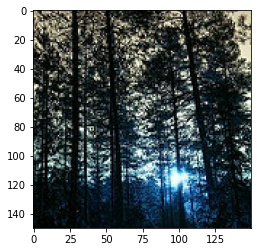

In [ ]:
import matplotlib.pyplot as plt 
count = 0
for im_path in os.listdir('/content/seg_pred/seg_pred'):
  im=cv2.imread(os.path.join('/content/seg_pred/seg_pred',im_path))
  im=cv2.resize(im,(IMG_SIZE,IMG_SIZE))
  im=np.array(im)
  plt.imshow(im)
  im=im.reshape(1,IMG_SIZE,IMG_SIZE,3)
  x=np.argmax(model_test.predict(im))
  print(CATEGORIES[x])
  

  count+=1
  if count>5:
    break

glacier


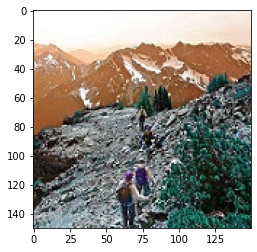

In [ ]:
im=cv2.imread(os.path.join('/content/seg_pred/seg_pred','4058.jpg'))
im=cv2.resize(im,(IMG_SIZE,IMG_SIZE))
im=np.array(im)
plt.imshow(im)
im=im.reshape(1,IMG_SIZE,IMG_SIZE,3)
x=np.argmax(model_test.predict(im))
print(CATEGORIES[x])

4058.jpg


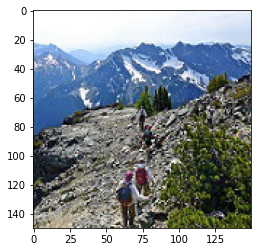

In [ ]:
img=['12607.jpg',
 '20351.jpg',
 '13438.jpg',
 '20902.jpg',
 '23080.jpg',
 '8812.jpg',
 '4058.jpg'
 ]


folder='/content/seg_pred/seg_pred'
image=os.path.join(folder,'4058.jpg')
print(impath)
imaag=plt.imread(image)
plt.imshow(imaag)



In [ ]:
x=np.argmax(model_test.predict())
#print(CATEGORIES[x])

IndexError: ignored

#ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet=ResNet50(input_shape=IMG_SHAPE,weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
resNet=Sequential()
for layer in resNet.layers:
  resNet.add(layer)

for layer in resNet.layers:
  layer.trainable=False

x=Flatten()(resnet.output)
prediction=Dense(6,activation='softmax')(x)

model_resnet=tf.keras.Model(inputs=resnet.input,outputs=prediction)

In [ ]:
model_resnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_resnet.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,callbacks=[callbacks])

Epoch 1/10
439/439 [==============================] - 44s 101ms/step - loss: 0.2322 - accuracy: 0.9488 - val_loss: 0.7170 - val_accuracy: 0.8223
Epoch 2/10
439/439 [==============================] - 44s 100ms/step - loss: 0.1055 - accuracy: 0.9684 - val_loss: 2.7748 - val_accuracy: 0.5653
Epoch 3/10
439/439 [==============================] - 45s 102ms/step - loss: 0.1054 - accuracy: 0.9794 - val_loss: 0.8697 - val_accuracy: 0.7967
Epoch 4/10
439/439 [==============================] - 45s 103ms/step - loss: 0.0613 - accuracy: 0.9858 - val_loss: 1.2055 - val_accuracy: 0.7590
Epoch 5/10
439/439 [==============================] - 45s 103ms/step - loss: 0.1283 - accuracy: 0.9698 - val_loss: 1.7207 - val_accuracy: 0.6913
Epoch 6/10
439/439 [==============================] - 45s 103ms/step - loss: 0.0427 - accuracy: 0.9856 - val_loss: 0.7933 - val_accuracy: 0.8347
Epoch 7/10
439/439 [==============================] - 45s 103ms/step - loss: 0.0430 - accuracy: 0.9897 - val_loss: 3.0261 - val_ac

sea


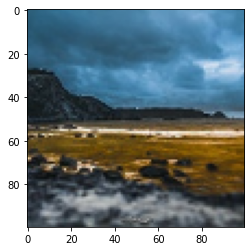

In [ ]:
im=cv2.imread(os.path.join('/content/seg_pred/seg_pred','10127.jpg'))
im=cv2.resize(im,(IMG_SIZE,IMG_SIZE))
im=np.array(im)
plt.imshow(im)
im=im.reshape(1,IMG_SIZE,IMG_SIZE,3)
x=np.argmax(model_resnet.predict(im))
print(CATEGORIES[x])

In [ ]:
score = model_resnet.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7303624153137207
Test accuracy: 0.8383333086967468


In [ ]:
model_resnet.save('resnet_on_intel_image')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: resnet_on_intel_image/assets


In [ ]:
from google.colab import files
#For the folder you have to zip it first and can only download later on
!zip -r resnet_on_intel_image.zip /content/resnet_on_intel_image
#Download files
files.download('resnet_on_intel_image.zip')



  adding: content/resnet_on_intel_image/ (stored 0%)
  adding: content/resnet_on_intel_image/variables/ (stored 0%)
  adding: content/resnet_on_intel_image/variables/variables.index (deflated 81%)
  adding: content/resnet_on_intel_image/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: content/resnet_on_intel_image/saved_model.pb (deflated 93%)
  adding: content/resnet_on_intel_image/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>